# ***MINNOR PROJECT - NATIONAL HEALTH AND NURATION EXAMINATION SURVEY:***


---


***Working with Numpy Matrices (Multidimensional Data)***   

***CONTEXT:***

The two following excperts from the National Health and NURATION Exception Survey (NHANES dataset):
1. nhanes_adult_male_bmx_2020.csv,
2. nhanes_adult_female_bmx_2020.csv.                                                                  
They give body measurements of adult males and females.

DATA DESCRIPTIONS:

Read the two files as numpy matrices named male and female. Each matrix consists 
of seven
COLUMNS:
1. weight(kg),
2. standing height(cm),
3. upper arm hight(cm),
4. upper leg length(cm),
5. arm circumfrence(cm),
6. hip circumfrence(cm),
7. waist circumfrence(cm).

**IMPORT PACKAGES AND WAREHOUSE DATA:**




In [2]:
# Importy packages
import pandas as pd # for data manupulation
import numpy as np # for numerical operation
from scipy import stats
from scipy.stats import skew, kurtosis
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt# Necessary module for plotting purpose
# plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns # Data visualization
%matplotlib inline

# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore");

# 2. **READ THE FILES**

# we read both male and female csv files 
1. nhanes_adult_male_bmx_2020.csv,
2. nhanes_adult_female_bmx_2020.csv. 


In [3]:
# import data files 
female_df = pd.read_csv('nhanes_adult_female_bmx_2020.csv')
male_df= pd.read_csv('nhanes_adult_male_bmx_2020.csv')


In [4]:
# convert the numpy array to a pandas dataframe
male=pd.DataFrame(male_df)
female=pd.DataFrame(female_df)

print("Male data shape:", male_df.shape)
print("\nFemale data shape:", female_df.shape)

print("\nFirst few rows of male data:\n", male_df.head())
print("\nFirst few rows of female data:\n", female_df.head())

Male data shape: (4081, 7)

Female data shape: (4221, 7)

First few rows of male data:
    BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST
0   98.8  182.3     42.0    40.1     38.2   108.2     120.4
1   74.3  184.2     41.1    41.0     30.2    94.5      86.8
2  103.7  185.3     47.0    44.0     32.0   107.8     109.6
3   86.0  167.8     39.5    38.4     29.0   106.4     108.3
4   99.4  181.6     40.4    39.9     36.0   120.2     107.0

First few rows of female data:
    BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST
0   97.1  160.2     34.7    40.8     35.8   126.1     117.9
1   91.1  152.7     33.5    33.0     38.5   125.5     103.1
2   73.0  161.2     37.4    38.0     31.8   106.2      92.0
3   61.7  157.4     38.0    34.7     29.0   101.0      90.5
4   55.4  154.6     34.6    34.0     28.3    92.5      73.2


* **DISPLAY INFO AND STATISTICS**

In [5]:
# Display basic info
print("Male data info:")
print(male_df.info())
print("\nFemale data info:")
print(female_df.info())

# Display basic statistics
print("\nMale data describe:")
print(male_df.describe())
print("\nFemale data describe:")
print(female_df.describe())

Male data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMXWT     4081 non-null   float64
 1   BMXHT     4081 non-null   float64
 2   BMXARML   4081 non-null   float64
 3   BMXLEG    4081 non-null   float64
 4   BMXARMC   4081 non-null   float64
 5   BMXHIP    4081 non-null   float64
 6   BMXWAIST  4081 non-null   float64
dtypes: float64(7)
memory usage: 223.3 KB
None

Female data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4221 entries, 0 to 4220
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMXWT     4221 non-null   float64
 1   BMXHT     4221 non-null   float64
 2   BMXARML   4221 non-null   float64
 3   BMXLEG    4221 non-null   float64
 4   BMXARMC   4221 non-null   float64
 5   BMXHIP    4221 non-null   float64
 6   BMXWAIST  4221 non-null   float64
dtyp

* **Remove outliers**

In [6]:
# Remove outliers
def remove_outliers(data):
    Q1, Q3 = np.percentile(data, [25, 75], axis=0)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    mask = np.all((data >= lower_bound) & (data <= upper_bound), axis=1)

    # Return data without outliers
    return data[mask]

# Apply the function to remove outliers
male_df = remove_outliers(male_df)
female_df = remove_outliers(female_df)

# print shape after cleaning
print("Male data shape after remove outliers:", male_df.shape)
print("Female data shape after remove outliers:", female_df.shape)

Male data shape after remove outliers: (3856, 7)
Female data shape after remove outliers: (3987, 7)


**Summary:**

* Both datas we read csv files male and female data files.
* Then we explor both datsets .
* Then we clean and display information statistics.
* And finally we remove outliers in both datsets.

 # 3.  **USING TWO HISTOGRAMS FOR MALE AND FEMALE WEIGHT**

we will visuaise describe male and female weight using histograms

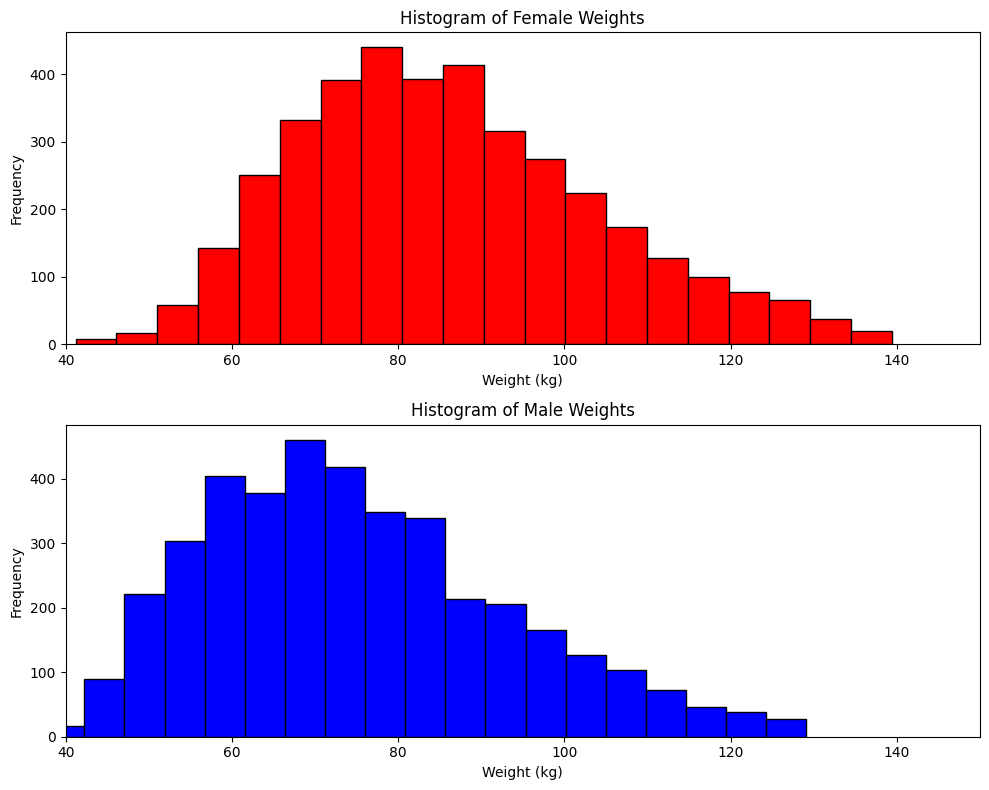

In [6]:
# Extract weights using column index 0


# Set the figure size
plt.figure(figsize=(10, 8))

# Top subplot for female weights
plt.subplot(2, 1, 1)
plt.hist(male_df['BMXWT'], bins=20, color='red', edgecolor='black')
plt.title('Histogram of Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(40, 150)                           # Set appropriate limits

# Bottom subplot for male weights
plt.subplot(2, 1, 2)
plt.hist(female_df['BMXWT'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(40, 150)                           # Set same limits for comparison

plt.tight_layout()
plt.show()

**OBSERVATON:**
1. In the female weights the maximum numbers of female in this weight is between 60 to 90 kg. 
2. In the male weights the maximum numbers of male in this  weight is between 75 to 100 kg.
3. In the female weights the minimum number of female in this  weight is between 130 to 180 kg.
4. In the male weights the minimum number of male in this weight is between  140 to 200 kg.

* **summary:**

we generating histograms of male and female weights there are only (60-85kg)male and(65-90kg)female weights have highest body weights.

# 4. **box-and-whisker plot** 

we will visualize the male and female weights using Box-and-Whisker plot

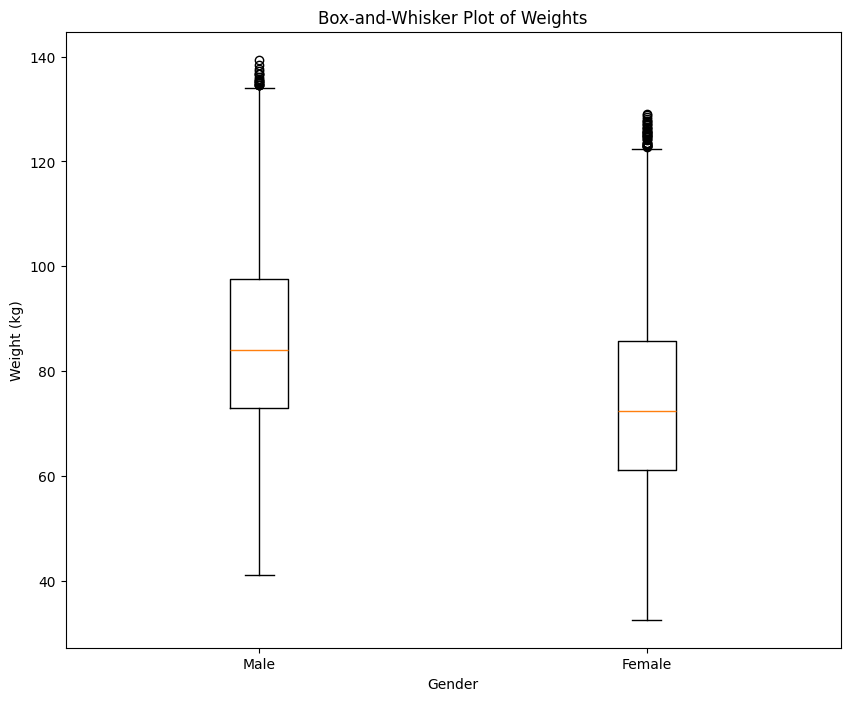

In [7]:
#set the box-and-whisker figure size
plt.figure(figsize=(10, 8))

# Create boxplot and whisker plot
plt.boxplot([male_df['BMXWT'],female_df['BMXWT']],labels=['Male','Female'])
plt.title('Box-and-Whisker Plot of Weights')
plt.xlabel('Gender')
plt.ylabel('Weight (kg)')
plt.show()


**Observation:**

* The (Q1 and Q3) 50% weights of male is between 60 to 95kg and (Q1 and Q3 )50% weights of female is between 60 to 85kg.
* Solid lines indicate the median in male and female box plots.
*  pointers that are further away are considered outlires.

**Summary:**

The box-and-whisker plot confirms that male has higher median value than female has less median value.


# 5. **Numerical Aggregates**

we will compute basic numerical aggrgates for the weight of male and female

In [8]:
# Compute basic statistics

female_stats = {
    'mean': np.mean(female_df['BMXWT']),
    'median': np.median(female_df['BMXWT']),
    'std': np.std(female_df['BMXWT']),
    'min': np.min(female_df['BMXWT']),
    'max': np.max(female_df['BMXWT']),
    'skewness': np.mean(((female_df['BMXWT'] - np.mean(female_df['BMXWT'])) /  np.std(female_df['BMXWT'])) ** 3)
}

male_stats = {
    'mean': np.mean(male_df['BMXWT']),
    'median': np.median(male_df['BMXWT']),
    'std': np.std(male_df['BMXWT']),
    'min': np.min(male_df['BMXWT']),
    'max': np.max(male_df['BMXWT']),
    'skewness': np.mean(((male_df['BMXWT'] - np.mean(male_df['BMXWT'])) /  np.std(male_df['BMXWT'])) ** 3)
}

female_stats, male_stats

({'mean': np.float64(74.91607725106597),
  'median': np.float64(72.5),
  'std': np.float64(18.080096015947365),
  'min': np.float64(32.6),
  'max': np.float64(129.1),
  'skewness': np.float64(0.560113492345258)},
 {'mean': np.float64(86.04214211618257),
  'median': np.float64(84.1),
  'std': np.float64(17.967569201910596),
  'min': np.float64(41.2),
  'max': np.float64(139.4),
  'skewness': np.float64(0.4717684246869686)})

**Observations:**

* **Location:** The mean and median weights of males are higher than those of females weights. 

* **Description:** The male have more variations in there weight.

* **shape:** The two distributions have a right skew, with a tail that extends toward higher weights and more people weighing less than the mean.

**Summary:** 

The male weight distribution exhibits a greater mean, median and dispersation. Both dispersions are right skewed, only men showing higher variation in there weights.

*  **OBSERVATIONS**


- **Location:** The mean and median weights of males are higher than those of females, suggesting that they weigh more overall.
- **Dispersion:** A higher standard deviation indicates that males have more variation in their weight.
- **Shape:** The two distributions have a right skew, with a tail that extends toward higher weights and more people weighing less than the mean.

**Summary:**

In comparison to the female distribution, the male weight distribution exhibits a greater mean, median, and dispersion. It looks that both distributions are right-skewed, with men showing higher variation in their weights.

# 6.  ***FEMALE MATRICS***

Adding BMXBMI to female metrix:

In [7]:
#female_df['BMXHT'] = female_df['BMXHT'] / 100
female_df['BMXHT'] = female_df['BMXHT'] / 100
# Calculate BMI
female_df['BMXBMI'] = female_df['BMXWT'] / (female_df['BMXHT'] ** 2)
# Add BMXBMI as a new column to the female matrix
female_df = np.column_stack((female_df, female_df['BMXBMI']))
# Print first five rows of the updated DataFrame
print("First five rows of updated female data with BMXBMI:\n", female_df[:5])

First five rows of updated female data with BMXBMI:
 [[ 97.1          1.602       34.7         40.8         35.8
  126.1        117.9         37.83504078  37.83504078]
 [ 91.1          1.527       33.5         33.          38.5
  125.5        103.1         39.06972037  39.06972037]
 [ 73.           1.612       37.4         38.          31.8
  106.2         92.          28.09265496  28.09265496]
 [ 61.7          1.574       38.          34.7         29.
  101.          90.5         24.90437849  24.90437849]
 [ 55.4          1.546       34.6         34.          28.3
   92.5         73.2         23.17879132  23.17879132]]


In [13]:
np.delete(female_df, 8, axis=1)

array([[ 97.1       ,   1.602     ,  34.7       , ..., 126.1       ,
        117.9       ,  37.83504078],
       [ 91.1       ,   1.527     ,  33.5       , ..., 125.5       ,
        103.1       ,  39.06972037],
       [ 73.        ,   1.612     ,  37.4       , ..., 106.2       ,
         92.        ,  28.09265496],
       ...,
       [ 73.        ,   1.596     ,  36.2       , ..., 104.6       ,
         99.3       ,  28.65873958],
       [ 78.6       ,   1.685     ,  38.1       , ..., 102.4       ,
         98.5       ,  27.68361084],
       [ 82.8       ,   1.478     ,  34.8       , ..., 121.4       ,
        110.        ,  37.90368801]])

* **Summary:** 

* female_df['BMXHT']: we convert hight from centimetre to meteres.
*  female_df['BMXBMI']: The BMXBMI values are appended to the female column by using*'np.column_stack(female_df, female_df['BMXBMI']).


# 7. ***STANDAREDIZED FEMALE MATRICX***

The female Matrix will be standeredized by calculating z-score for each column.

The procedure below  can be used to generate  a new matrix called zfemale, which is standerdized version of the female dataset with z-scores to all of its columns:

1. The female metrix's Mean and Standard Deviation for each column.
2. To standardize each column,divide the result by the standard variation.

In [16]:
# Assuming female_df is a pandas DataFrame
# Compute the mean and standard deviation for each column
mean_female = female_df.mean()
std_female = female_df.std()

# Calculate the z-scores for each column (standardize the data)
zfemale = (female_df - mean_female) / std_female

# Print the first five rows of standardized female data
print("First five rows of standardized z_female data:\n", zfemale[:5])



First five rows of standardized z_female data:
 [[ 1.37262467 -1.37481102 -0.42259604 -0.2471017  -0.39094952  2.20694199
   1.97103158 -0.33240229 -0.33240229]
 [ 1.2000073  -1.37696874 -0.45711951 -0.47150429 -0.3132717   2.18968025
   1.54524205 -0.29688109 -0.29688109]
 [ 0.67927821 -1.37452333 -0.34491822 -0.32765648 -0.50602777  1.63442769
   1.2258999  -0.61268646 -0.61268646]
 [ 0.35418216 -1.37561657 -0.32765648 -0.42259604 -0.58658254  1.48482597
   1.18274556 -0.70441178 -0.70441178]
 [ 0.17293391 -1.37642212 -0.42547299 -0.44273473 -0.60672124  1.24028469
   0.68503213 -0.75405617 -0.75405617]]


* **Summary:**

The female dataset standardized the data and  allowing for better  comperision across measurrment 

# 8.**Scatterplot Matrix (Pairplot) for Standardized Female Data and  Compute Pearson's and Spearman's Correlation Coefficients**

A  scatterplot  matrix  (pairplot)  for  the  standardised  versions  of  height,  weight, 
waist  circumference,  hip  circumference,  and  BMI  of  the  females  (based  on  zfemale). 
Compute Pearson’s and  Spearman’s correlation coefficients for all pairs of variables. 
Interpret the obtained results.

### 1. ***Scatterplot Matrics:***

Create the pairplot using seaborn library.

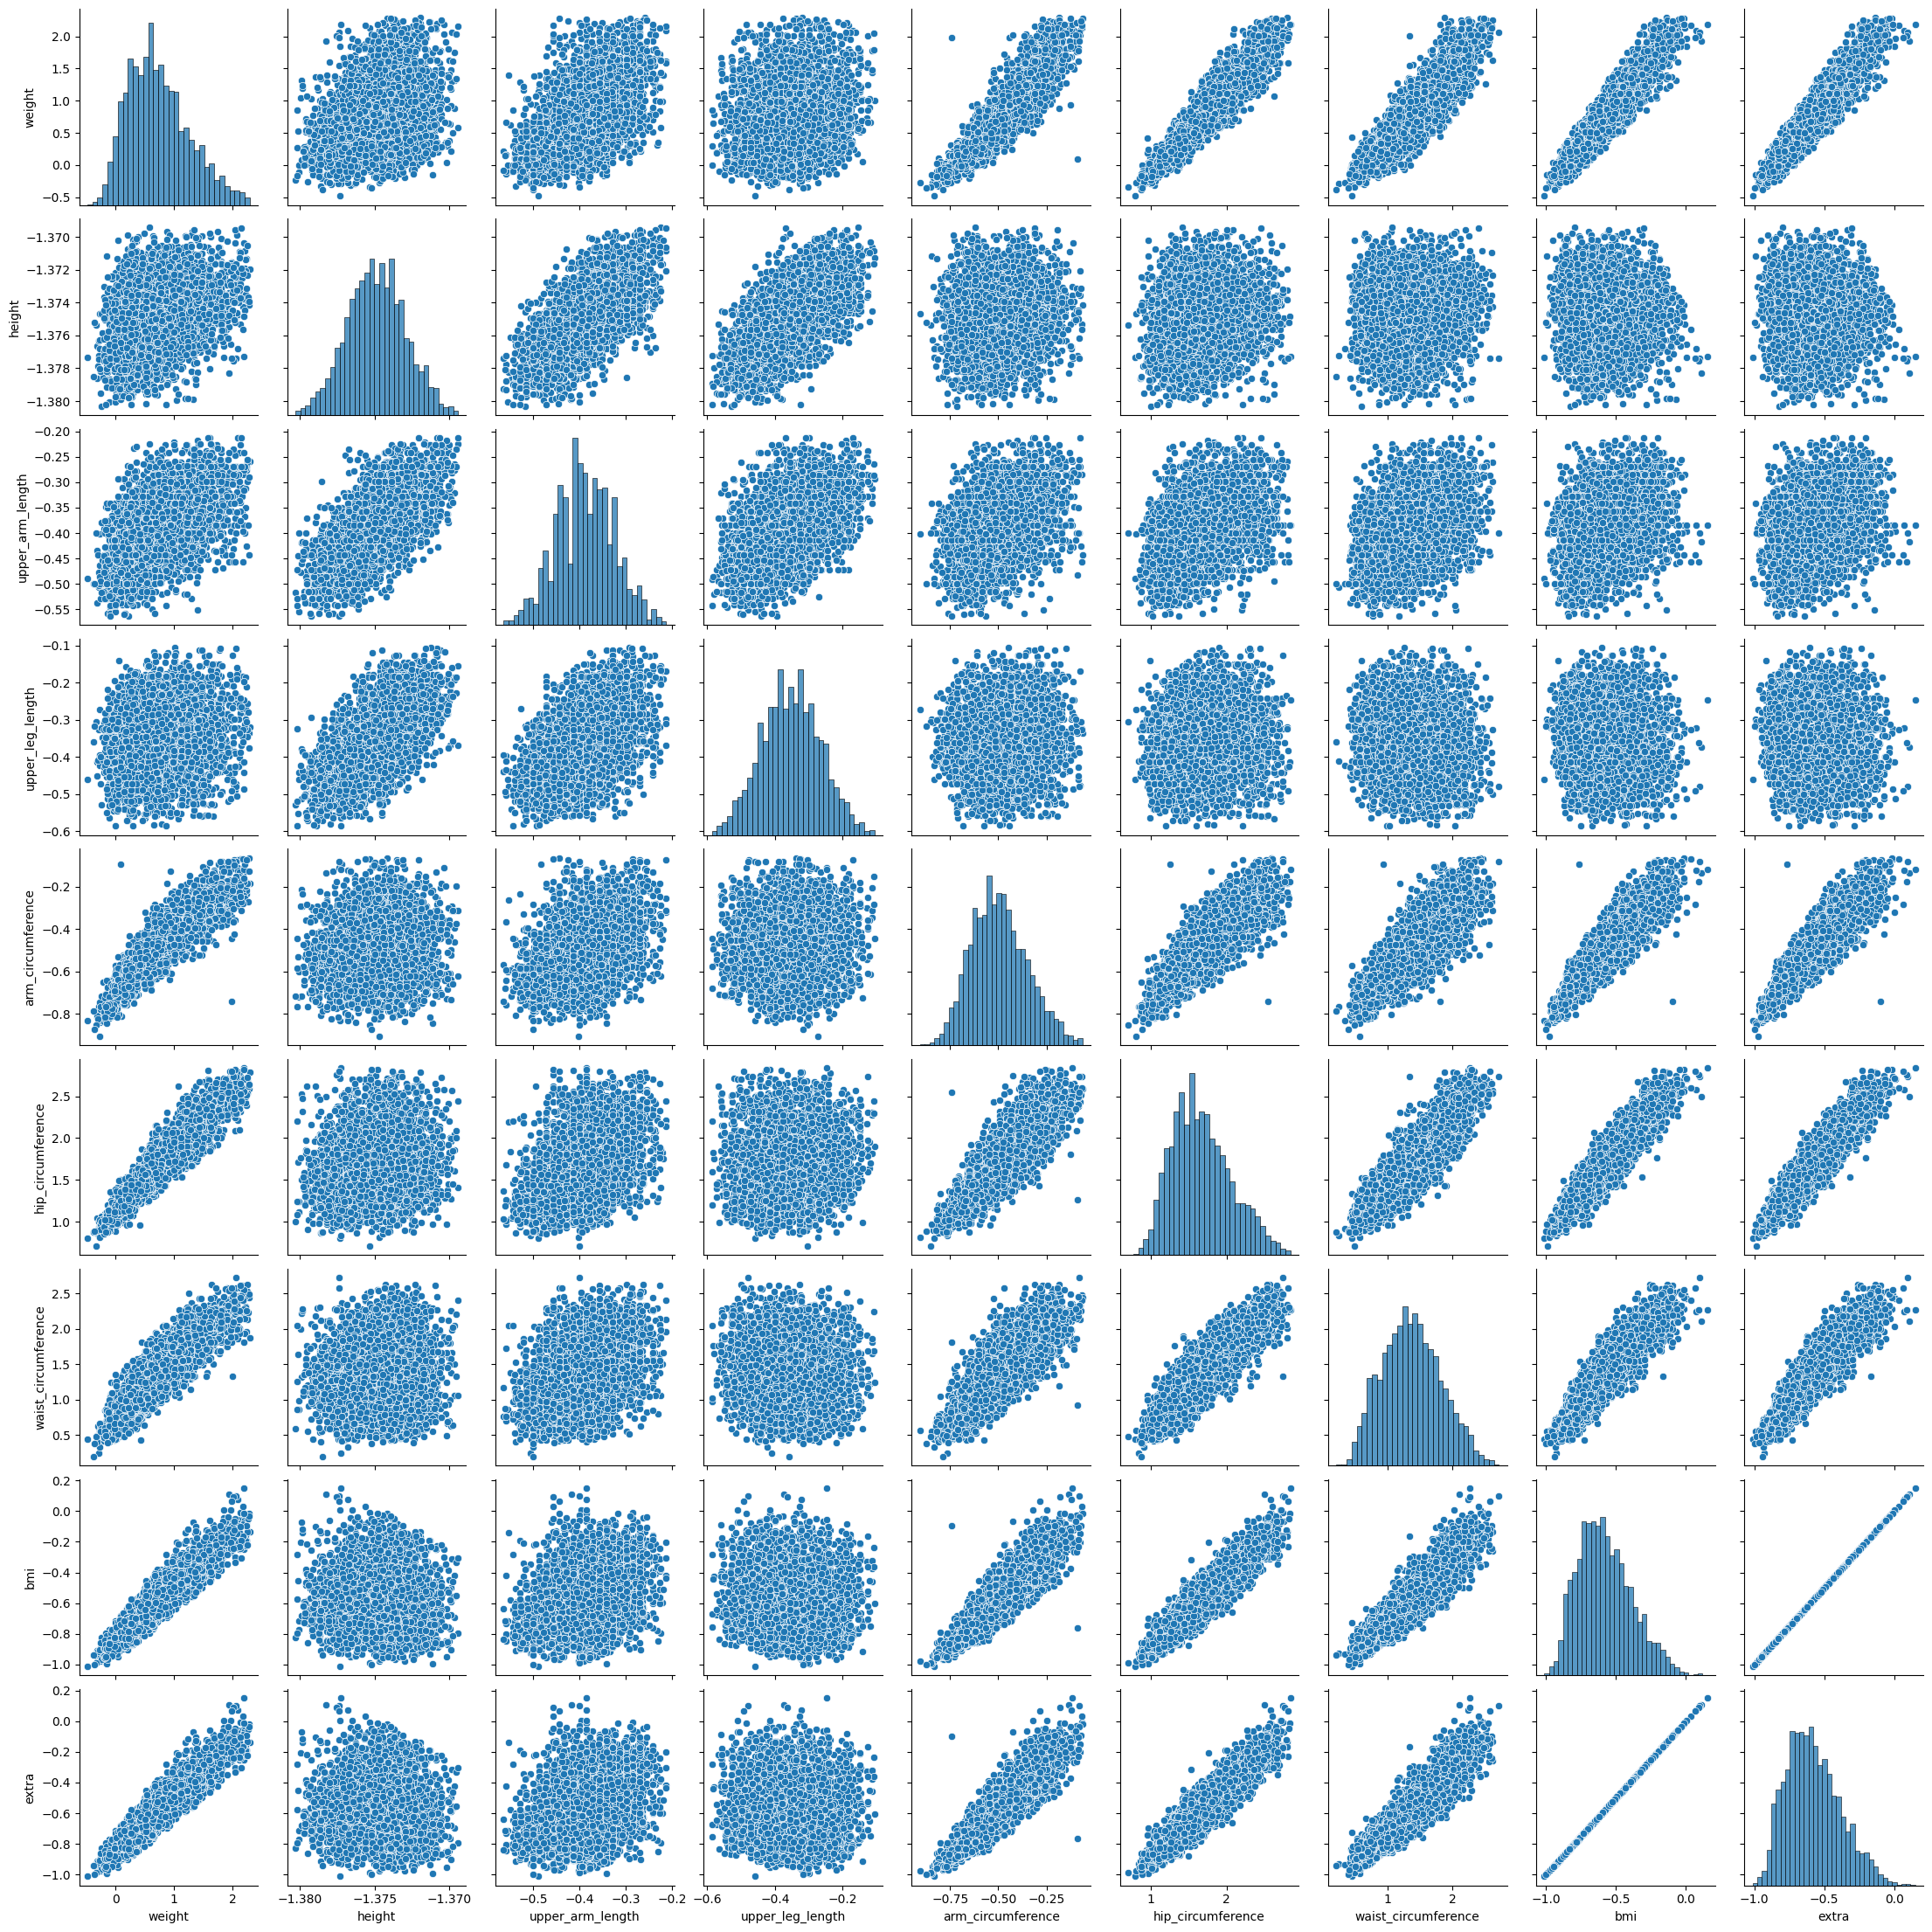

In [11]:
# Convert standardized matrix to DataFrame
zfemale_df = pd.DataFrame(zfemale, columns=['weight', 'height', 'upper_arm_length', 'upper_leg_length', 'arm_circumference', 'hip_circumference', 'waist_circumference', 'bmi','extra'])

# Create a pairplot
sns.pairplot(zfemale_df)
plt.show()


**Summary:**

Relationships between the chosen variables are visualized using the scatterplot matrix.

### 2.  ***Compute Pearson's and Spearman's Correlation Coefficients:***  

Next, let's calculate both Pearson's and Spearman's correlation coefficients for these variables.

In [31]:
# Compute Pearson's correlation coefficients
pearson_corr = zfemale_df.corr(method='pearson')

# Compute Spearman's correlation coefficients
spearman_corr = zfemale_df.corr(method='spearman')

# Display the correlation matrices
print("Pearson's Correlation Coefficients:\n", pearson_corr)
print("\nSpearman's Correlation Coefficients:\n", spearman_corr)

Pearson's Correlation Coefficients:
                        weight    height  upper_arm_length  upper_leg_length  \
weight               1.000000  0.317725          0.509477          0.187973   
height               0.317725  1.000000          0.655113          0.644470   
upper_arm_length     0.509477  0.655113          1.000000          0.468295   
upper_leg_length     0.187973  0.644470          0.468295          1.000000   
arm_circumference    0.896965  0.104669          0.391210          0.063538   
hip_circumference    0.936267  0.161673          0.409966          0.093763   
waist_circumference  0.888042  0.074614          0.374327         -0.062701   
bmi                  0.935233 -0.029446          0.299492         -0.035729   
extra                0.935233 -0.029446          0.299492         -0.035729   

                     arm_circumference  hip_circumference  \
weight                        0.896965           0.936267   
height                        0.104669           0

**Interpret the obtained results:**

**Persion's Correlation**: It measures the strength and direction of linear correlations. For example, a significant positive Pearson correlation between weight and BMI indicates that when weight increases, so does BMI.

**Spearman's Correlation**: Measures the strength of monotonic correlations based on data rank. It may emphasize non-linear relationships.


# 9. **Compute Waist-to-Height and Waist-to-Hip Ratios**

The waist circumference to height ratio and the waist circumference to hip 
circumference ratio of the male and female participants 

In [32]:
#compute waist to hip ratio(WATHIP)
male_df['WATHIP'] = male_df['BMXWAIST']/male_df['BMXHIP']
#compute waist to hight ratio(WATHEIGHT)
male_df['WATHEIGHT'] = male_df['BMXWAIST']/male_df['BMXHT']
#print result
print("male data frame with WTHHIP(waist to hip) and WTHHEIGHT(waist to height) ratios:")
print(male_df)


male data frame with WTHHIP(waist to hip) and WTHHEIGHT(waist to height) ratios:
      BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST    WATHIP  \
0      98.8  182.3     42.0    40.1     38.2   108.2     120.4  1.112754   
1      74.3  184.2     41.1    41.0     30.2    94.5      86.8  0.918519   
3      86.0  167.8     39.5    38.4     29.0   106.4     108.3  1.017857   
4      99.4  181.6     40.4    39.9     36.0   120.2     107.0  0.890183   
5      90.2  162.5     38.7    38.0     37.3   110.2     116.2  1.054446   
...     ...    ...      ...     ...      ...     ...       ...       ...   
4076  114.3  174.5     42.0    35.5     37.0   117.4     119.5  1.017888   
4077   94.3  178.8     37.8    44.6     35.7   105.3      99.3  0.943020   
4078  108.8  168.7     38.6    45.6     33.6   118.0     114.7  0.972034   
4079   79.5  176.4     39.5    42.0     31.4    99.8      97.1  0.972946   
4080   59.7  167.5     40.3    41.1     29.2    90.5      86.9  0.960221   

      

In [77]:
#compute waist to hip ratio(WATHIP)
female_df['WATHIP'] = male_df['BMXWAIST']/male_df['BMXHIP']
#compute waist to hight ratio(WATHEIGHT)
female_df['WATHEIGHT'] = male_df['BMXWAIST']/male_df['BMXHT']
#print result
print("female data frame with WTHHIP(waist to hip) and WTHHEIGHT(waist to height) ratios:")
print(female_df)

female data frame with WTHHIP(waist to hip) and WTHHEIGHT(waist to height) ratios:
      BMXWT  BMXHT  BMXARML  BMXLEG  BMXARMC  BMXHIP  BMXWAIST    WATHIP  \
0      97.1  160.2     34.7    40.8     35.8   126.1     117.9  1.112754   
1      91.1  152.7     33.5    33.0     38.5   125.5     103.1  0.918519   
2      73.0  161.2     37.4    38.0     31.8   106.2      92.0  1.016698   
3      61.7  157.4     38.0    34.7     29.0   101.0      90.5  1.017857   
4      55.4  154.6     34.6    34.0     28.3    92.5      73.2  0.890183   
...     ...    ...      ...     ...      ...     ...       ...       ...   
4216   66.8  157.0     32.6    38.4     30.7   103.8      92.5       NaN   
4217  116.9  167.4     42.2    43.0     40.7   128.4     120.0       NaN   
4218   73.0  159.6     36.2    37.0     31.4   104.6      99.3       NaN   
4219   78.6  168.5     38.1    40.2     36.0   102.4      98.5       NaN   
4220   82.8  147.8     34.8    32.8     39.5   121.4     110.0       NaN   

    

* **Summary**:
 
 The male and female matrics add 2 new columns:
 
1. **Waist-to-height Ratio**: Compare waist size to height size to provide health hazereds distribution pattrns.

2. **Waist-to-hip Ratio**: compare Waist size to hip size to provide insight into fat distribution pattrns.

# 10 **Box-and-Wisker Plot For Ratios**

 comparing the distribution of the waistto-height ratio and the waist-to-hip ratio of both male and female participants

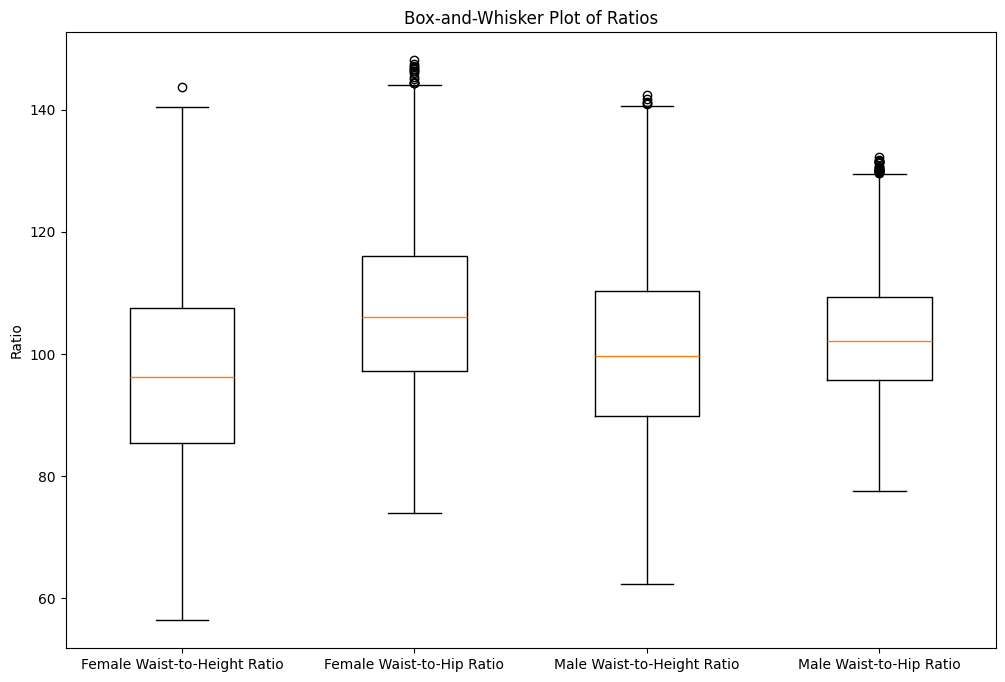

In [84]:
# Prepare data for boxplot
data_ratios = [
    female_df.iloc[:, -1],  # Female Waist-to-Height Ratio
    female_df.iloc[:, -2],  # Female Waist-to-Hip Ratio
   
    male_df.iloc[:, -1],    # Male Waist-to-Height Ratio
    male_df.iloc[:, -2]     # Male Waist-to-Hip Ratio
]

# Create the box-and-whisker plot
plt.figure(figsize=(12, 8))
plt.boxplot(data_ratios,labels=['Female Waist-to-Height Ratio', 'Female Waist-to-Hip Ratio', 'Male Waist-to-Height Ratio', 'Male Waist-to-Hip Ratio'])
plt.title('Box-and-Whisker Plot of Ratios')
plt.ylabel('Ratio')
plt.show()

**Observations:**

In comparison to men, women have a lower median and less variation (**Waist-to-Height Ratio:**).
  - **Males:** Greater variability and a higher median.

**Waist-to-Hip Ratio:** - **Females:** Wider hips are reflected by a higher median with less variation.
  - **Males:** Less noticeable hips are indicated by a lower median and greater variation.

**Summaray:**

The waist-to-hip and waist-to-height ratios show clear disparities between boys and girls according to the box-and-whisker plot:

* Due to usual gender disparities in fat distribution, women typically have higher waist-to-hip ratios but lower waist-to-height ratios.

* Men often have lower waist-to-hip and higher waist-to-height ratios, which suggests a distinct distribution pattern of body fat and greater variation in their body

# 11. **Advantages and Disadvantages:**

#### **Body Mass Index (BMI):**
- **Advantages:**

 - It is straightforward and quick to calculate based on height and weight.
 - It is commonly employed as a general tool to screen for obesity and underweight conditions.
 - It allows for easy comparisons across large populations.

- **Disadvantages:**
 - It does not differentiate between muscle mass and fat mass.
 - It may inaccurately categorize athletic individuals as overweight or obese.
 - It overlooks fat distribution considerations.

#### **Waist-to-Height Ratio:**

- **Advantages:**

 - It is easy to measure and calculate.
 - It provides insights into fat distribution.
 - It is a better predictor of health risks compared to BMI.

- **Disadvantages:**

 - Its usage is less common than that of BMI.
 - Measurement errors can impact accuracy.


# 12. **Standardized Measurements for Extremes in BMI**

In [20]:
# Find indices of lowest and highest BMIs
sorted_indices = np.argsort(zfemale_df['BMXBMI'])    # Sort by BMI column
# Identify indices of the lowest and highest BMI
lowest_indices = sorted_indices[:5]        # Indices of the 5 participants with the lowest BMI
highest_indices = sorted_indices[-5:]      # Indices of the 5 participants with the highest BMI

# Extract the standardized measurements for the lowest and highest BMIs
lowest_measurements = zfemale[lowest_indices]
highest_measurements = zfemale[highest_indices]

# Print the standardized measurements
print("Standardized Measurements for 5 Participants with the Lowest BMI:\n", lowest_measurements)
print("\nStandardized Measurements for 5 Participants with the Highest BMI:\n", highest_measurements)

Standardized Measurements for 5 Participants with the Lowest BMI:
 [[-2.34047857 -1.24671606 -1.60528697 -1.23178309 -2.34794168 -2.23970899
  -2.05958598 -2.26062368 -1.24671606]
 [-2.10264797 -0.16317632 -1.78927838  0.42348667 -2.62695879 -2.02442984
  -2.18794409 -2.19618911 -0.16317632]
 [-1.69335811  1.92968812  0.74060349  0.62211904 -2.42766085 -1.81657411
  -1.79645184 -2.16825985  1.92968812]
 [-2.05840042 -0.23739137 -0.17935355  0.55590825 -2.46752044 -2.48468182
  -1.96331739 -2.13438084 -0.23739137]
 [-1.78185322  0.96489246 -0.04136     0.52280286 -2.36787147 -1.99473617
  -1.80286974 -2.07783789  0.96489246]]

Standardized Measurements for 5 Participants with the Highest BMI:
 [[ 2.60971638 -0.97954188  0.05063571  0.35727588  2.57471744  2.34054051
   1.96444097  3.40527421 -0.97954188]
 [ 2.46038089 -1.36546015 -1.0993106  -0.10619965  2.19605135  2.8082159
   2.0029484   3.49822647 -1.36546015]
 [ 2.54334505 -1.27640208 -0.17935355 -1.46352085  2.87366435  2.73398171

**Interpretation of Results:**
* Lowest BMI:

  - Individuals in this group typically exhibit lower standardized weights and higher standardized heights, indicating a leaner physique with reduced body fat.

* Highest BMI:

  - People in this category show higher standardized weights and lower standardized heights, suggesting a heavier and possibly more obese body type.

# **Conclusion:**

This project uses NumPy and Matplotlib to analyze body measurements of adult males and females from the NHANES dataset. We calculated BMI, examined weight distributions, and compared gender-specific statistics using histograms and boxplots. We also analyzed correlations and standardized the data to explore the relationships among different bodily measurements. Besides, we computed and compared waist-to-hip and waist-to-height ratios. This research provides valuable insights for health assessments and gender-based comparisons by emphasizing measurement variability and body composition.

# **Final Thoughts:**

This project displayed how valuable NumPy and Matplotlib are for processing and visualizing data. By using the NHANES dataset, we gained a thorough understanding of body measurements in adult men and women through statistical methods and observational tools. The study pointed out the benefits and limitations of various body measurement approaches while also revealing important differences between genders. Future research could explore factors influencing metabolism and health outcomes, or apply advanced statistical techniques to improve findings.